### The third Jupyter Notebook (CSV file)

### 1.  Load Key Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 2. Load Data 

##### The data from the Ocean Observatories Initiative (OOI) available at  https://dataexplorer.oceanobservatories.org/#. The data used in this analysis is based on advanced sensors of deployed buoys in The coordinates 59.935683°N, -39.471917°E are located in the North Atlantic Ocean.

#####  The dataset used  is based on minute-resolution measurements of **Sea Surface Temperature(SST)** to help understanding of ocean  ecosystems and the impacts of climate change through long-term.

In [2]:
# read the file into DataFrame
df= pd.read_csv("seat.csv")
df

/tmp/ipykernel_12766/2972426696.py:2: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("seat.csv")


,time,sea_surface_temperature,sea_surface_temperature_qc_agg,z
0,UTC,degree_Celsius,NaN,m
1,2023-12-29T04:01:00Z,5.073999882,2.0,0
2,2023-12-29T04:02:00Z,5.073999882,2.0,0
3,2023-12-29T04:03:00Z,5.070261001,2.0,0
4,2023-12-29T04:04:00Z,5.068999767,2.0,0
...,...,...,...,...
373787,2024-10-17T04:46:00Z,7.763,1.0,0
373788,2024-10-17T04:47:00Z,7.765,1.0,0
373789,2024-10-17T04:48:00Z,7.765,1.0,0
373790,2024-10-17T04:49:00Z,7.766,1.0,0


In [3]:
# Dropping the first row as it contains header info that is not needed
df = df.drop(index=0)
df = df.drop(columns=['sea_surface_temperature_qc_agg', 'z'])
df

,time,sea_surface_temperature
1,2023-12-29T04:01:00Z,5.073999882
2,2023-12-29T04:02:00Z,5.073999882
3,2023-12-29T04:03:00Z,5.070261001
4,2023-12-29T04:04:00Z,5.068999767
5,2023-12-29T04:05:00Z,5.068999767
...,...,...
373787,2024-10-17T04:46:00Z,7.763
373788,2024-10-17T04:47:00Z,7.765
373789,2024-10-17T04:48:00Z,7.765
373790,2024-10-17T04:49:00Z,7.766


In [4]:
# formate the time 
df['time'] = pd.to_datetime(df['time'].str.replace('Z', ''))
df['time']

1        2023-12-29 04:01:00
2        2023-12-29 04:02:00
3        2023-12-29 04:03:00
4        2023-12-29 04:04:00
5        2023-12-29 04:05:00
                 ...        
373787   2024-10-17 04:46:00
373788   2024-10-17 04:47:00
373789   2024-10-17 04:48:00
373790   2024-10-17 04:49:00
373791   2024-10-17 04:51:00
Name: time, Length: 373791, dtype: datetime64[ns]

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


time                       0
sea_surface_temperature    0
dtype: int64

In [6]:
#  A summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373791 entries, 1 to 373791
Data columns (total 2 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   time                     373791 non-null  datetime64[ns]
 1   sea_surface_temperature  373791 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 5.7+ MB


In [7]:
# convert 'sea_surface_temperature' to float
df['sea_surface_temperature'] = pd.to_numeric(df['sea_surface_temperature'], errors='coerce')
df
# Verify the conversion
print(df.dtypes)

time                       datetime64[ns]
sea_surface_temperature           float64
dtype: object


In [8]:
# Set 'timestamp' as index
df.set_index('time', inplace=True)


In [9]:
# Resample to Hourly resolution and calculate the mean
hourly_data = df.resample('H').mean()
hourly_data 

,sea_surface_temperature
time,
2023-12-29 04:00:00,5.071418
2023-12-29 05:00:00,5.068983
2023-12-29 06:00:00,5.067770
2023-12-29 07:00:00,5.067997
2023-12-29 08:00:00,5.065431
...,...
2024-10-17 00:00:00,7.758489
2024-10-17 01:00:00,7.755441
2024-10-17 02:00:00,7.758772


In [10]:
# Resample to daily resolution and calculate the mean
daily_data = df.resample('D').mean()
daily_data

,sea_surface_temperature
time,
2023-12-29,5.064632
2023-12-30,5.035944
2023-12-31,4.995873
2024-01-01,4.981356
2024-01-02,4.925733
...,...
2024-10-13,7.836728
2024-10-14,7.811687
2024-10-15,7.702883


In [11]:

# Resample to monthly resolution and calculate the mean
monthly_data = df.resample('M').mean()
monthly_data 

,sea_surface_temperature
time,
2023-12-31,5.030769
2024-01-31,4.782440
2024-02-29,4.499675
2024-03-31,4.405342
2024-04-30,4.790508
2024-05-31,5.671132
2024-06-30,7.116484
2024-07-31,8.582614
2024-08-31,9.224518


### 3. Plot some Data

##### The  mean temperature helps understand hourly, daily or monthly fluctuations. This can help to understand patterns like the hottest times or cooler periods. More analysis can provide comprehensive understanding of the dynamics of sea surface temperature and their impact on marine ecosystems, weather patterns, and climate change.

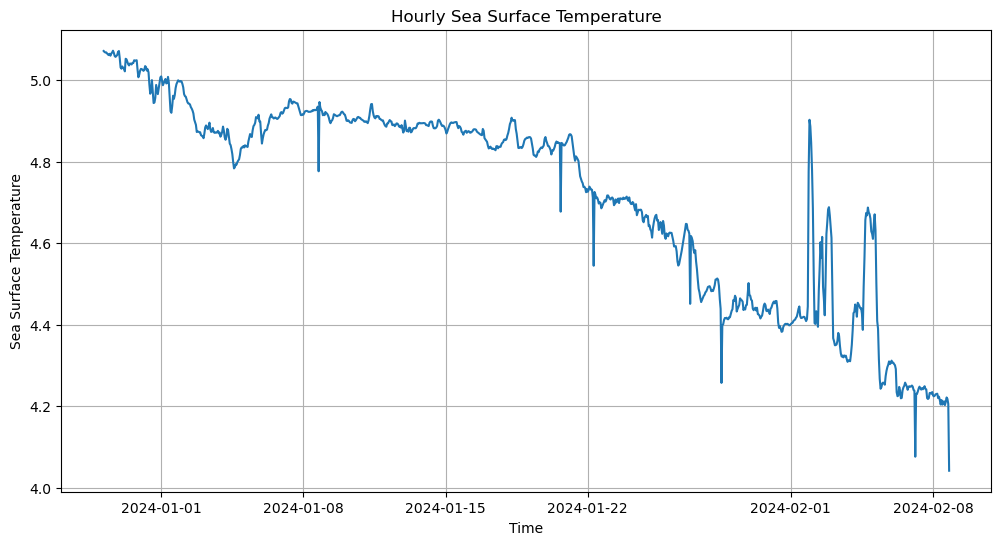

In [12]:
# Plotting the sea surface temperature
plt.figure(figsize=(12, 6))
df_subset = hourly_data.iloc[:1000]
plt.plot(df_subset.index, hourly_data['sea_surface_temperature'][0:1000], linestyle='-')
plt.title('Hourly Sea Surface Temperature')
plt.xlabel('Time')
plt.ylabel('Sea Surface Temperature')
plt.grid()
plt.show()

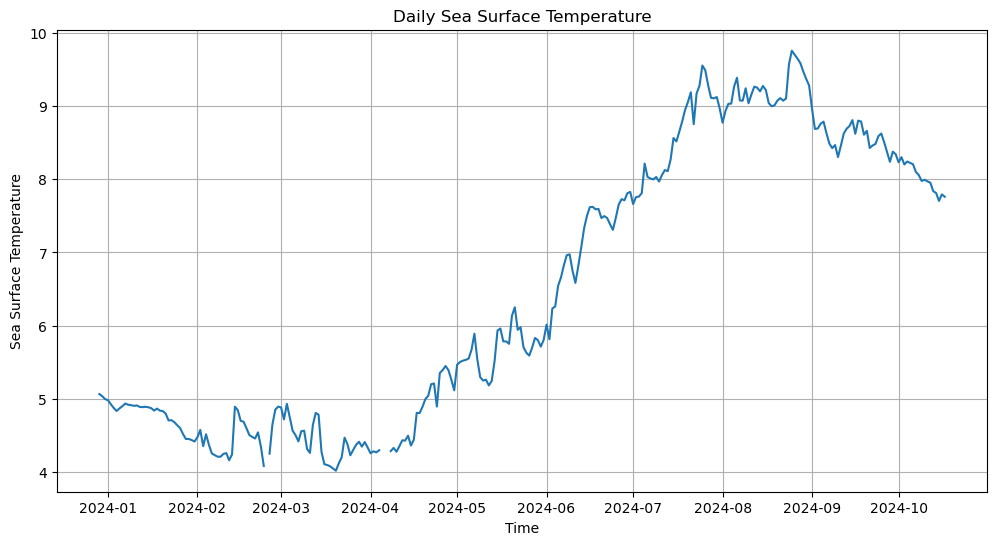

In [13]:
# Plotting the sea surface temperature
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['sea_surface_temperature'], linestyle='-')
plt.title('Daily Sea Surface Temperature')
plt.xlabel('Time')
plt.ylabel('Sea Surface Temperature')
plt.grid()
plt.show()

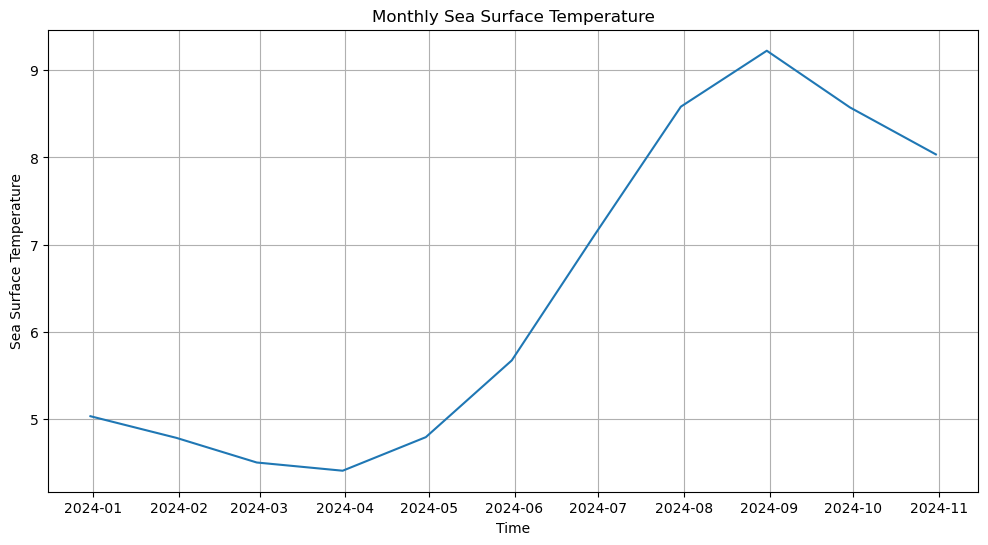

In [14]:
# Plotting the sea surface temperature
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['sea_surface_temperature'], linestyle='-')
plt.title('Monthly Sea Surface Temperature')
plt.xlabel('Time')
plt.ylabel('Sea Surface Temperature')
plt.grid()
plt.show()